In [2]:
import pandas as pd       
import numpy as np         
import seaborn as sns
import matplotlib.pyplot as plt     

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mlxtend.evaluate import bias_variance_decomp    
  
from sklearn.model_selection import RandomizedSearchCV   

# 1.Decision Tree     

## Data Preprocessing        

In [3]:
df = pd.read_csv("/Users/azura/Desktop/DDA_ass3/penguins.csv") 
print("Size of the dataframe = ", df.shape)  
df.head()                      

Size of the dataframe =  (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Drop the NaN and Null values  
df = df.dropna()         
print("Size of the dataframe = ", df.shape)    
df.head()                

Size of the dataframe =  (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Data Statistics      

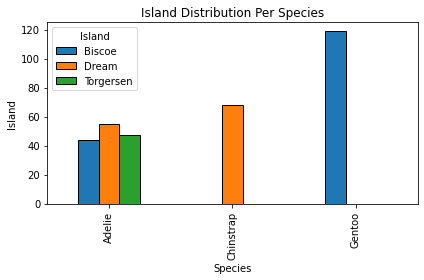

In [8]:
grouped_counts = df.groupby(['species', 'island']).size().reset_index(name='count')

fig, ax = plt.subplots()   
grouped_counts.pivot_table(index='species', columns='island', values='count', fill_value=0).plot(kind='bar', ax=ax, edgecolor='black')

ax.set_title('Island Distribution Per Species')
ax.set_xlabel('Species')
ax.set_ylabel('Island')
ax.legend(title='Island')  
    
plt.tight_layout()  
      
plt.savefig("/Users/azura/Desktop/Statistics_1.png", dpi=300, bbox_inches="tight")
plt.show()  

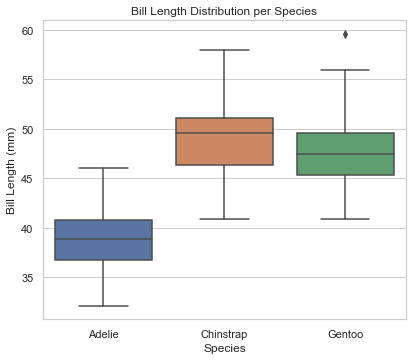

In [9]:
sns.set(style="whitegrid")  
plt.figure(figsize=(6.5, 5.5))      
  
sns.boxplot(x='species', y='bill_length_mm', data=df)

plt.title('Bill Length Distribution per Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
  
plt.savefig("/Users/azura/Desktop/Statistics_2.png", dpi=300, bbox_inches="tight")
plt.show()  

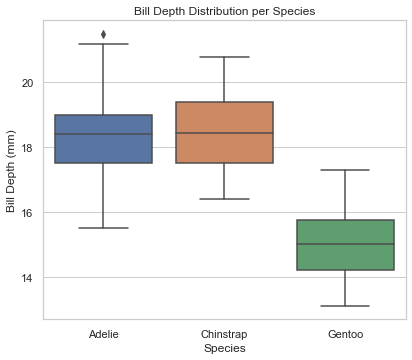

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(6.5, 5.5)) 

sns.boxplot(x='species', y='bill_depth_mm', data=df)

plt.title('Bill Depth Distribution per Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')  

plt.savefig("/Users/azura/Desktop/Statistics_3.png", dpi=300, bbox_inches="tight")
plt.show()  

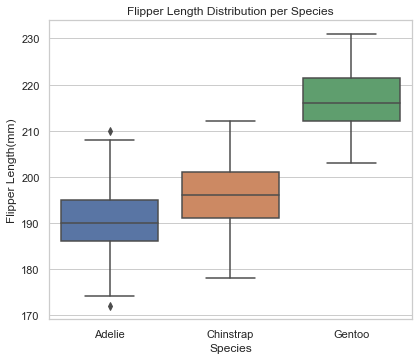

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(6.5, 5.5)) 

sns.boxplot(x='species', y='flipper_length_mm', data=df)

plt.title('Flipper Length Distribution per Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length(mm)')  
  
plt.savefig("/Users/azura/Desktop/Statistics_4.png", dpi=300, bbox_inches="tight")

plt.show()  

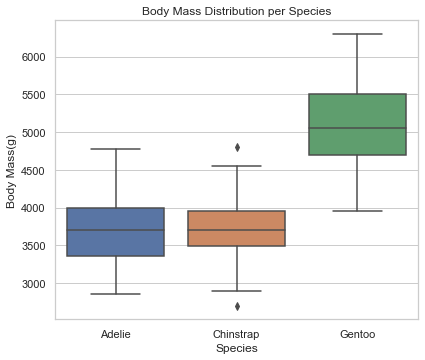

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(6.5, 5.5)) 

sns.boxplot(x='species', y='body_mass_g', data=df)

plt.title('Body Mass Distribution per Species')
plt.xlabel('Species')
plt.ylabel('Body Mass(g)')       
  
plt.savefig("/Users/azura/Desktop/Statistics_5.png", dpi=300, bbox_inches="tight")

plt.show()  

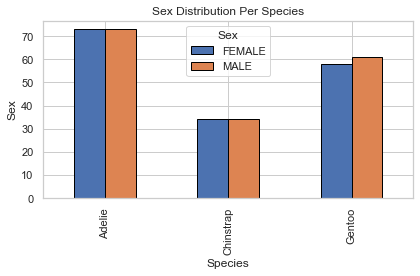

In [13]:
grouped_counts = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig, ax = plt.subplots()   
grouped_counts.pivot_table(index='species', columns='sex', values='count', fill_value=0).plot(kind='bar', ax=ax, edgecolor='black')

ax.set_title('Sex Distribution Per Species')
ax.set_xlabel('Species')
ax.set_ylabel('Sex')
ax.legend(title='Sex')
  
plt.tight_layout()    

plt.savefig("/Users/azura/Desktop/Statistics_6.png", dpi=300, bbox_inches="tight")

plt.show()  

## Deicision Tree    

In [5]:
# 对类别特征进行标签编码     
le = LabelEncoder()      
df_encoded = df.copy()
df_encoded['island_encoded'] = le.fit_transform(df_encoded['island'])
df_encoded['sex_encoded'] = le.fit_transform(df_encoded['sex'])  

df_encoded.drop(columns=['island', 'sex'], inplace=True)
  
df_encoded.head()        

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_encoded,sex_encoded
0,Adelie,39.1,18.7,181.0,3750.0,2,1
1,Adelie,39.5,17.4,186.0,3800.0,2,0
2,Adelie,40.3,18.0,195.0,3250.0,2,0
4,Adelie,36.7,19.3,193.0,3450.0,2,0
5,Adelie,39.3,20.6,190.0,3650.0,2,1


In [7]:
X = df_encoded.drop(columns=['species'])  
y = df_encoded['species']             

In [8]:
classes = np.sort(pd.unique(y))  
n_samples = X.shape[0]      
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

print(f"# of training data : {len(y_train)}")  
print(f"# of test data     : {len(y_test)}")   

# of training data : 249
# of test data     : 84


Train Accuracy : 0.9598
Test  Accuracy : 0.9762


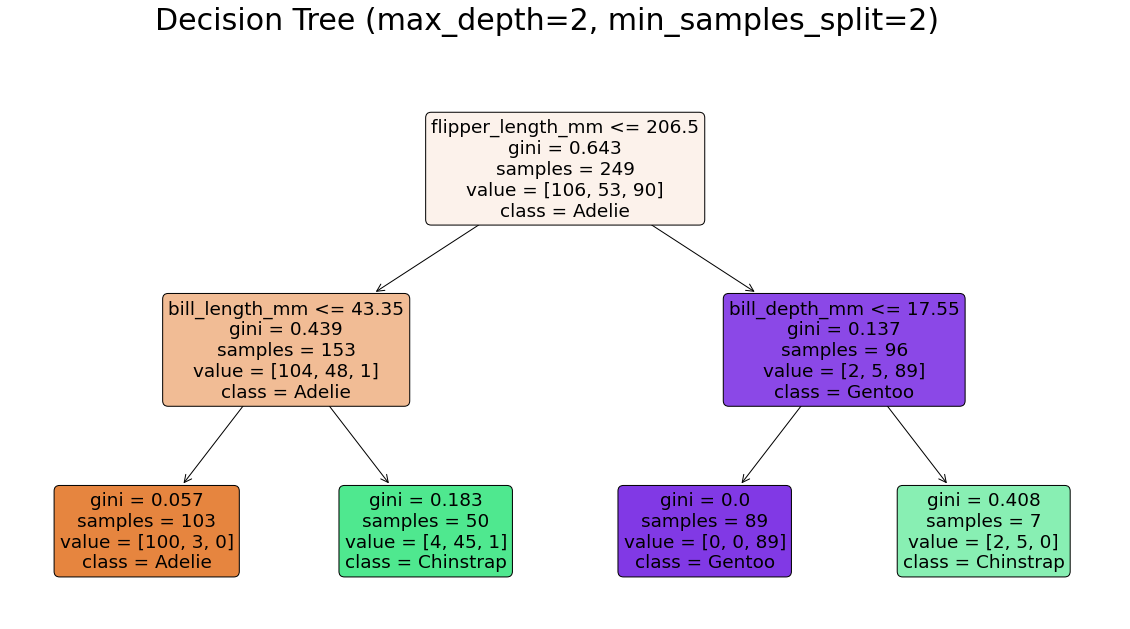

In [18]:
# case 1
max_depth = 2     
min_samples_split = 2         
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
  
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
      
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_1.png", dpi=300, bbox_inches="tight")   
plt.show()  

Train Accuracy : 0.992
Test  Accuracy : 0.9881


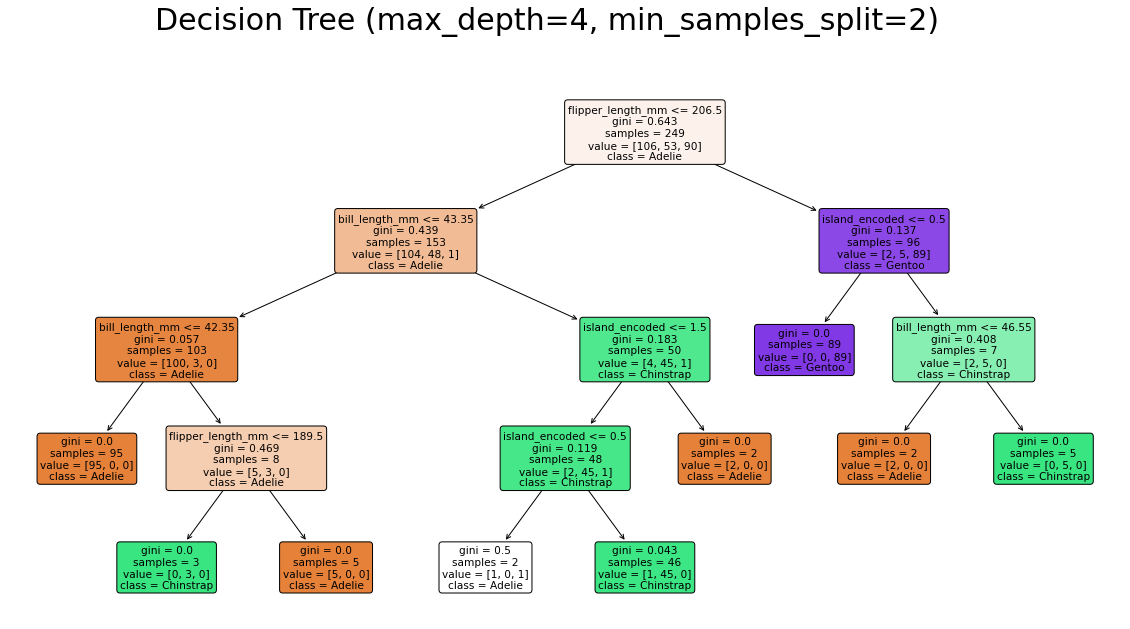

In [17]:
# case 2
max_depth = 4               
min_samples_split = 2    
     
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)  
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
          
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_2.png", dpi=300, bbox_inches="tight")
plt.show()    

Train Accuracy : 1.0
Test  Accuracy : 0.9881


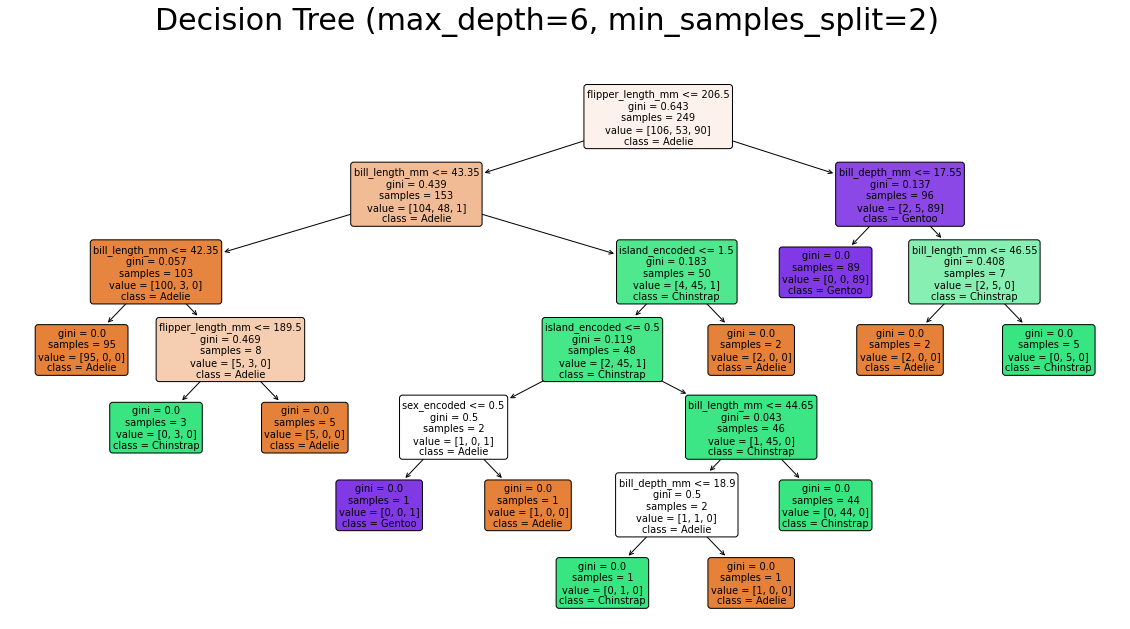

In [16]:
# case 3
max_depth = 6     
min_samples_split = 2      
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
            
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_3.png", dpi=300, bbox_inches="tight")
plt.show()  

Train Accuracy : 0.9598
Test  Accuracy : 0.9762


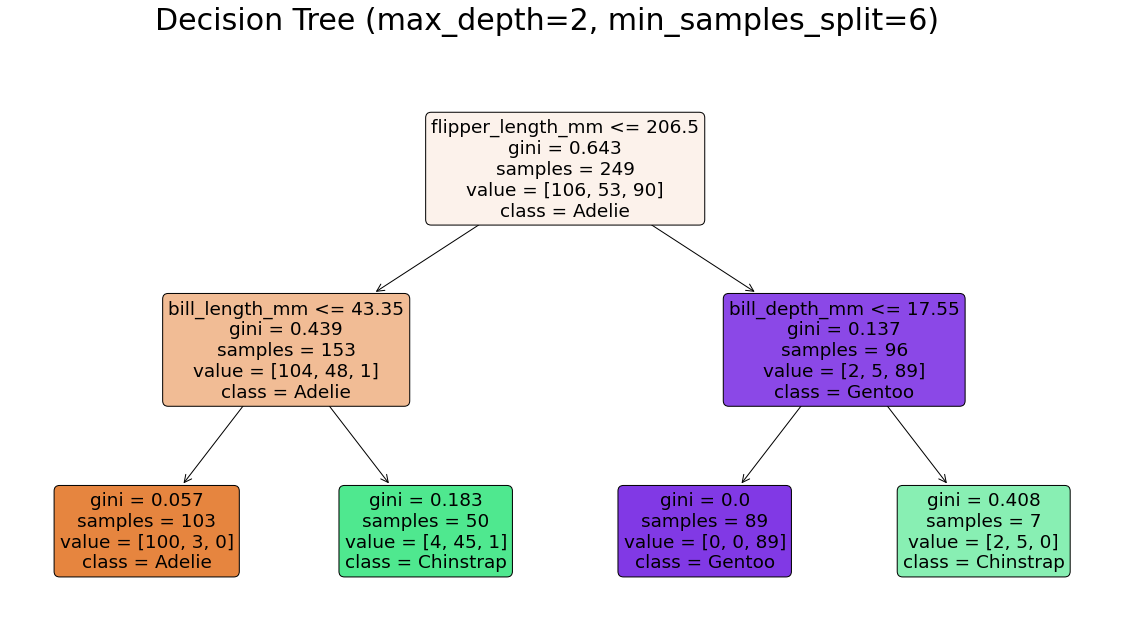

In [15]:
# case 4
max_depth = 2     
min_samples_split = 6        
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
            
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_4.png", dpi=300, bbox_inches="tight")
plt.show()  

Train Accuracy : 0.992
Test  Accuracy : 0.9881


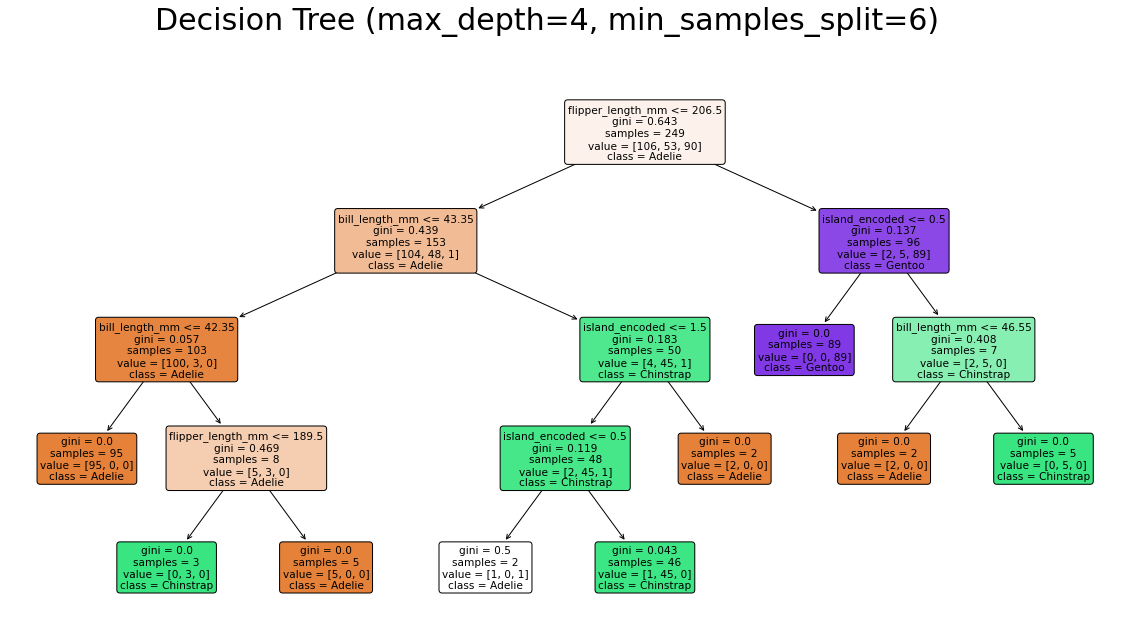

In [14]:
# case 5
max_depth = 4       
min_samples_split = 6      
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")  
          
plt.figure(figsize=(20, 10))    
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_5.png", dpi=300, bbox_inches="tight")
plt.show()    

Train Accuracy : 0.992
Test  Accuracy : 0.9881


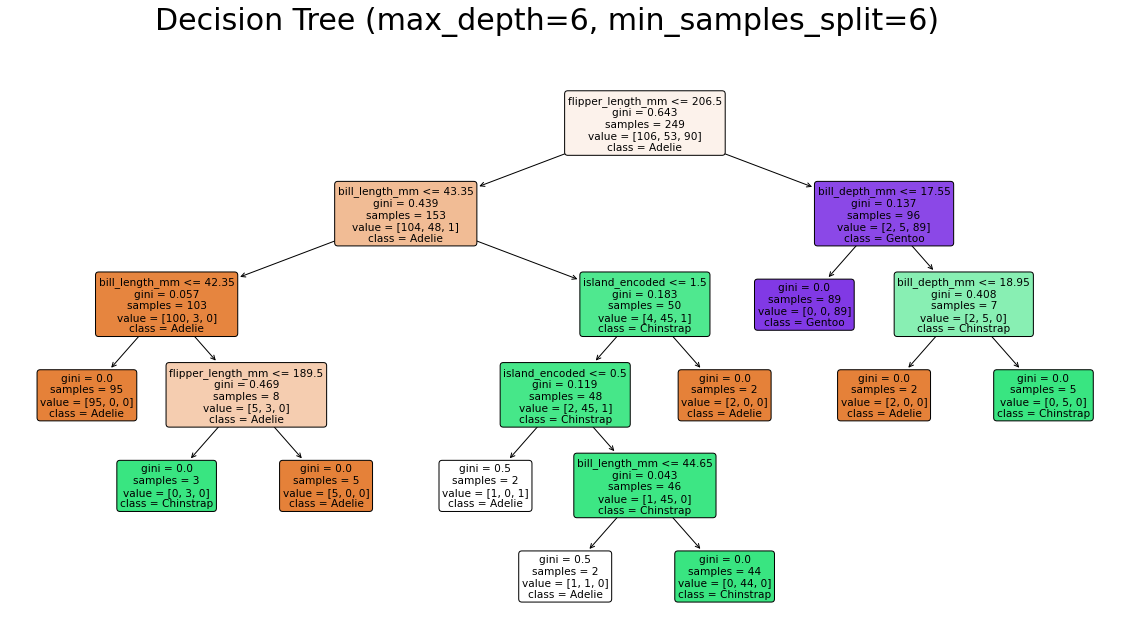

In [13]:
# case 6
max_depth = 6         
min_samples_split = 6      
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
      
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
          
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_6.png", dpi=300, bbox_inches="tight")
plt.show()    

Train Accuracy : 0.9598
Test  Accuracy : 0.9762


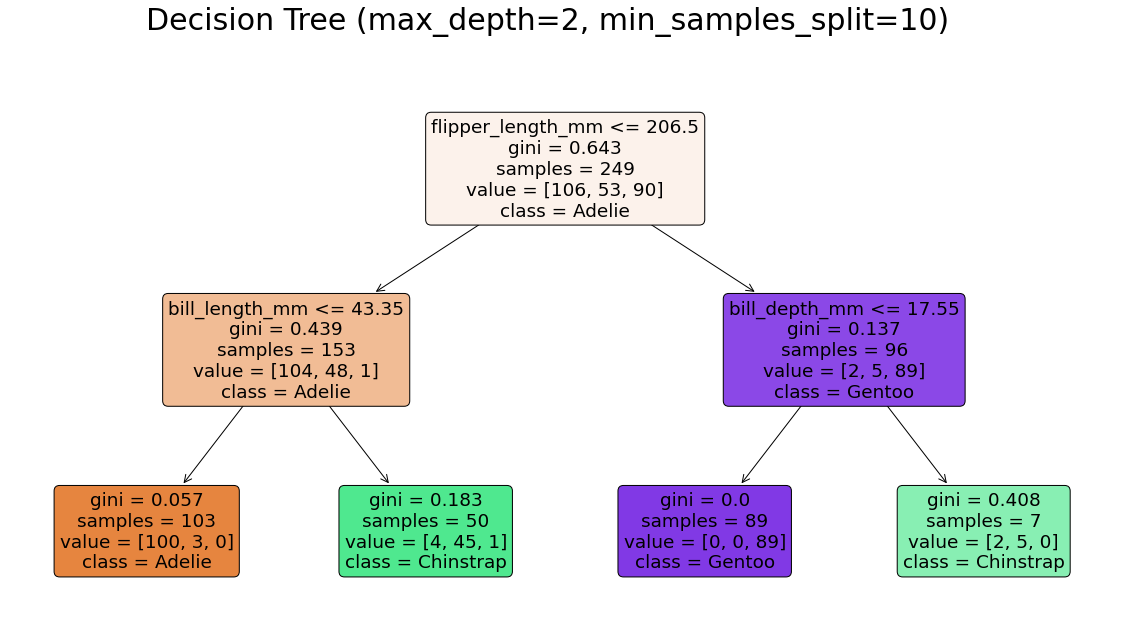

In [11]:
# case 7  
max_depth = 2       
min_samples_split = 10          
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
          
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)   
plt.savefig("/Users/azura/Desktop/tree_7.png", dpi=300, bbox_inches="tight")
plt.show()  

Train Accuracy : 0.9719
Test  Accuracy : 0.9762


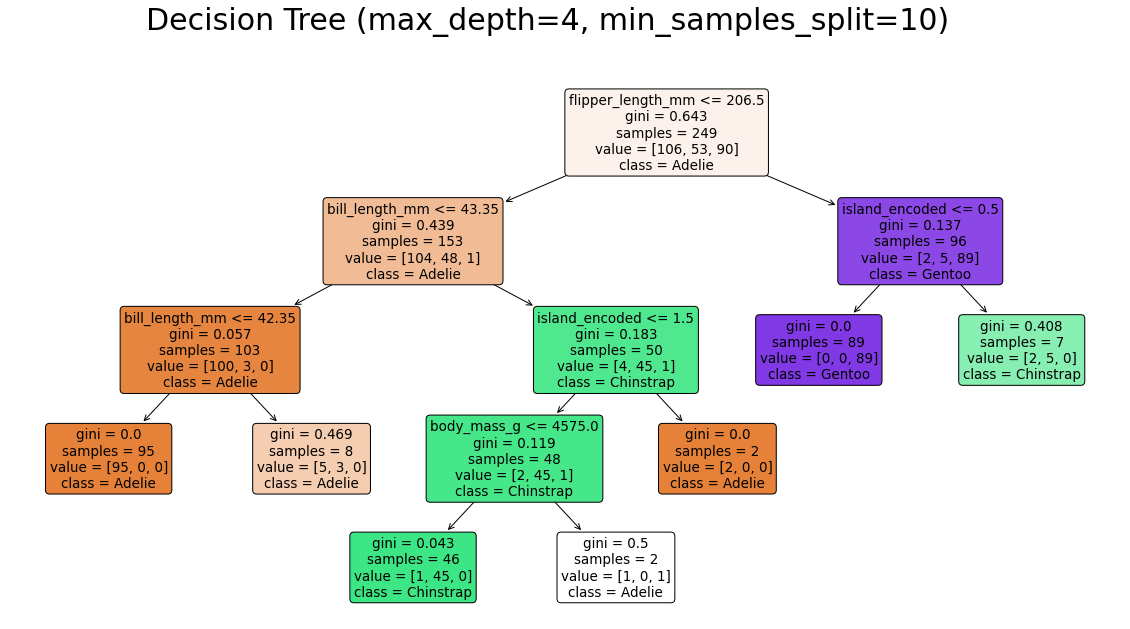

In [10]:
# case 8
max_depth = 4       
min_samples_split = 10        
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
          
plt.figure(figsize=(20, 10))      
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)     
plt.savefig("/Users/azura/Desktop/tree_8.png", dpi=300, bbox_inches="tight")
plt.show()  

Train Accuracy : 0.9719
Test  Accuracy : 0.9762


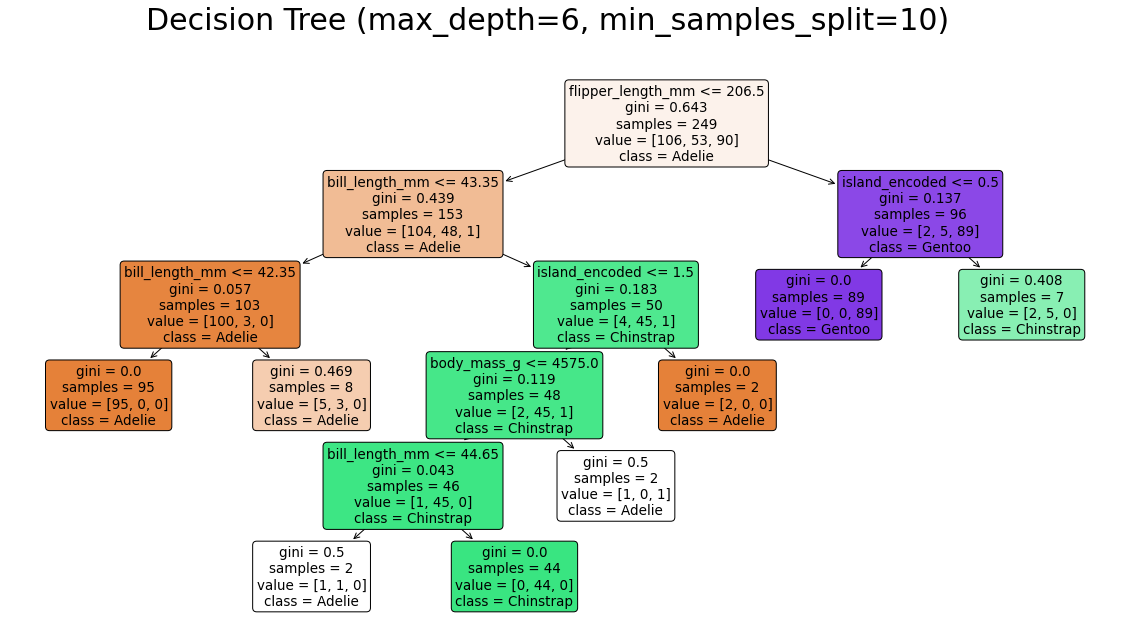

In [9]:
# case 9  
max_depth = 6         
min_samples_split = 10        
  
clf = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth)  
clf.fit(X_train, y_train)    
    
print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")
          
plt.figure(figsize=(20, 10))    
plot_tree(clf, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded'], class_names = classes.tolist(), rounded=True)  
plt.suptitle(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split})", fontsize=30)     
plt.savefig("/Users/azura/Desktop/tree_9.png", dpi=300, bbox_inches="tight")
plt.show()  

## Bagging of trees    

In [50]:
# case 1
max_depth = 2     
min_samples_split = 2  
n_estimators = 3  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9639
Test  Accuracy : 0.9762


In [52]:
# case 2
max_depth = 2     
min_samples_split = 2  
n_estimators = 6    

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9598
Test  Accuracy : 0.9762


In [53]:
# case 3
max_depth = 2     
min_samples_split = 2  
n_estimators = 9  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9598
Test  Accuracy : 0.9762


In [54]:
# case 4
max_depth = 3     
min_samples_split = 2  
n_estimators = 3  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9759
Test  Accuracy : 0.9762


In [55]:
# case 5
max_depth = 3     
min_samples_split = 2  
n_estimators = 6  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9799
Test  Accuracy : 0.9762


In [56]:
# case 6
max_depth = 3     
min_samples_split = 2  
n_estimators = 9  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.988
Test  Accuracy : 0.9881


In [57]:
# case 7
max_depth = 4     
min_samples_split = 2  
n_estimators = 3  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 1.0
Test  Accuracy : 0.9881


In [58]:
# case 8
max_depth = 4     
min_samples_split = 2  
n_estimators = 6  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.996
Test  Accuracy : 0.9881


In [59]:
# case 9
max_depth = 4     
min_samples_split = 2  
n_estimators = 9  

dt = DecisionTreeClassifier(min_samples_split=min_samples_split,
                            max_depth=max_depth)

clf = BaggingClassifier(estimator=dt,  
                        n_estimators=n_estimators,
                        random_state=0)   

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.996
Test  Accuracy : 0.9881


## Random forests  

In [60]:
# case 1
max_depth = 4
min_samples_split = 2
n_estimators = 3  
max_features = 1       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9558
Test  Accuracy : 0.9643


In [61]:
# case 2
max_depth = 4
min_samples_split = 2
n_estimators = 3  
max_features = 3       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.988
Test  Accuracy : 0.9881


In [62]:
# case 3
max_depth = 4
min_samples_split = 2
n_estimators = 3  
max_features = 5       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 1.0
Test  Accuracy : 0.9881


In [63]:
# case 4
max_depth = 4
min_samples_split = 2
n_estimators = 6  
max_features = 1       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.9839
Test  Accuracy : 0.9762


In [64]:
# case 5
max_depth = 4
min_samples_split = 2
n_estimators = 6  
max_features = 3       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.996
Test  Accuracy : 0.9881


In [65]:
# case 6
max_depth = 4
min_samples_split = 2
n_estimators = 6  
max_features = 5       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.996
Test  Accuracy : 0.9881


In [66]:
# case 7
max_depth = 4
min_samples_split = 2
n_estimators = 9  
max_features = 1       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 0.996
Test  Accuracy : 0.9881


In [67]:
# case 8
max_depth = 4
min_samples_split = 2
n_estimators = 9  
max_features = 3       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 1.0
Test  Accuracy : 0.9881


In [68]:
# case 9
max_depth = 4
min_samples_split = 2
n_estimators = 9  
max_features = 5       

clf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             max_features=max_features)

clf.fit(X_train, y_train)

print(f"Train Accuracy : {round(clf.score(X_train, y_train), 4)}")
print(f"Test  Accuracy : {round(clf.score(X_test, y_test), 4)}")

Train Accuracy : 1.0
Test  Accuracy : 0.9881


## The relationship between bias/ variance and the number of trees  

In [69]:
le = LabelEncoder()   
df_encoded_ = df_encoded.copy()
df_encoded_['species_encoded'] = le.fit_transform(df_encoded_['species'])  

df_encoded_.drop(columns=['species'], inplace=True)
    
df_encoded_.head()       

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_encoded,sex_encoded,species_encoded
0,39.1,18.7,181.0,3750.0,2,1,0
1,39.5,17.4,186.0,3800.0,2,0,0
2,40.3,18.0,195.0,3250.0,2,0,0
4,36.7,19.3,193.0,3450.0,2,0,0
5,39.3,20.6,190.0,3650.0,2,1,0


In [70]:
X = df_encoded_.drop(columns=['species_encoded'])  
y = df_encoded_['species_encoded']          
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)   

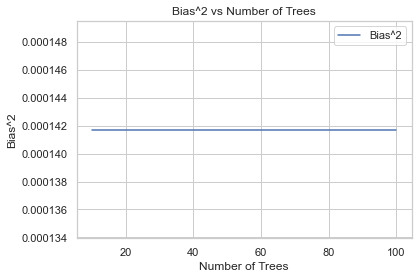

In [71]:
tree_numbers = np.arange(1, 11) * 10   

bias2_list = []
variance_list = []          
    
for num_trees in tree_numbers: 
    clf = RandomForestClassifier(random_state=0,
                             n_estimators=num_trees)
    
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='0-1_loss', random_seed=42)
    
    bias2_list.append(avg_bias**2)
    variance_list.append(avg_var)
    
    
plt.plot(tree_numbers, bias2_list, label='Bias^2')
plt.xlabel('Number of Trees')
plt.ylabel('Bias^2')  
plt.title('Bias^2 vs Number of Trees')  
plt.legend()
plt.savefig("/Users/azura/Desktop/bias^2.png", dpi=300, bbox_inches="tight")
plt.show()  

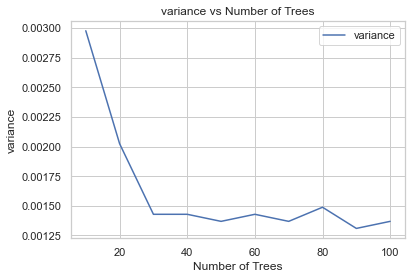

In [72]:
plt.plot(tree_numbers, variance_list, label='variance')
plt.xlabel('Number of Trees')  
plt.ylabel('variance')  
plt.title('variance vs Number of Trees')  
plt.legend()
plt.savefig("/Users/azura/Desktop/variance.png", dpi=300, bbox_inches="tight")
plt.show()    